# Heart Disease Prediction with Machine Learning

Determine whether or not patient is diagnosed with Heart Disease using: Logistic Regression, Naive Bayes, Random Forest, kNN & SVM

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

#### Explore data columns and shape

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### There are 13 Feature Columns and 1 Label Column (i.e. target)

In [4]:
df.shape 

(303, 14)

#### Drop rows where thal=0 (since thal=0 maps to null in original dataset). Therefore, dataset row size reduced from 303 to 301.

In [5]:
df.loc[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [6]:
df.drop(index=[48,281],inplace=True)
print(df.shape)

(301, 14)


#### Explore dataset's min, max, mean column values & check for missing values

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,0.966777,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,1.398671,0.734219,2.328904,0.544850
std,9.110950,0.465534,1.032259,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.584347,0.498814
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
age         301 non-null int64
sex         301 non-null int64
cp          301 non-null int64
trestbps    301 non-null int64
chol        301 non-null int64
fbs         301 non-null int64
restecg     301 non-null int64
thalach     301 non-null int64
exang       301 non-null int64
oldpeak     301 non-null float64
slope       301 non-null int64
ca          301 non-null int64
thal        301 non-null int64
target      301 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [9]:
df.isnull().sum() # Check for missing values and how many exist per Column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Preprocessing

### Part 1: Convert Categorical Features

#### There are 8 Categorical Features: sex, cp, fbs, restecg, exang, slope, ca, thal

In [10]:
# Check for unique values across all columns
cols = df.columns

print('Unique Values for each Column \n')
for c in cols:
    print(c, ':\n', df[c].unique(),'\n')

Unique Values for each Column 

age :
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

sex :
 [1 0] 

cp :
 [3 2 1 0] 

trestbps :
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 108 134 122
 115 118 128 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

chol :
 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 256 231 141 252 201 222 260 182 303 265 309 186
 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255 207
 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271 268
 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224 206
 167 230 335 276 353 225 330 290 172 305 216 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 23

#### There is no need to convert the Categorical Features already in Binary format (i.e. sex, fbs, exang). <br><br> Convert the Categorical Features not in Binary format.

In [11]:
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Store converted features into new DataFrame 
data = pd.get_dummies(df,columns=categorical_features,drop_first=True) 
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,...,0,0,0,1,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,1,...,1,0,0,1,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,0,0,1,0,0,0,0,1,0


#### The feature space has expanded. Now, there are 21 Feature Columns and 1 Label Column (i.e. target)

In [12]:
print('Total Number of Columns: ', len(data.columns), '\n', data.columns)

Total Number of Columns:  22 
 Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_2', 'thal_3'],
      dtype='object')


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 22 columns):
age          301 non-null int64
sex          301 non-null int64
trestbps     301 non-null int64
chol         301 non-null int64
fbs          301 non-null int64
thalach      301 non-null int64
exang        301 non-null int64
oldpeak      301 non-null float64
target       301 non-null int64
cp_1         301 non-null uint8
cp_2         301 non-null uint8
cp_3         301 non-null uint8
restecg_1    301 non-null uint8
restecg_2    301 non-null uint8
slope_1      301 non-null uint8
slope_2      301 non-null uint8
ca_1         301 non-null uint8
ca_2         301 non-null uint8
ca_3         301 non-null uint8
ca_4         301 non-null uint8
thal_2       301 non-null uint8
thal_3       301 non-null uint8
dtypes: float64(1), int64(8), uint8(13)
memory usage: 27.3 KB


### Part 2: Prepare Training and Testing Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Divide Features into X and Labels into y
X = data.drop('target', axis=1, inplace=False)
y = df['target']
print(X.shape)
print(y.shape)

(301, 21)
(301,)


In [16]:
# Split dataset into 80% training set and 20% validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (240, 21)
X_test shape:  (61, 21)
y_train shape:  (240,)
y_test shape:  (61,)


### Part 3: Standardize Data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test) 

## Machine Learning

In [18]:
# Define Model Evaluation Function
from sklearn.metrics.classification import classification_report, accuracy_score

def report_performance(y_preds, y_test):
    
    print(classification_report(y_preds, y_test))
    acc = accuracy_score(y_preds, y_test)
    
    print(f'accuracy: {acc}')

### Model #1: Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

#### Fit Logistic Regression Model on Training Set

In [20]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_s, y_train)

C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluate Logistic Regression Model on Testing Set

In [21]:
log_pred_test = lr.predict(X_test_s)
report_performance(log_pred_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

accuracy: 0.8688524590163934


### Model #2: Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

#### Fit Naive Bayes Model on Training Set

In [23]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Evaluate Naive Bayes Model on Testing Set

In [24]:
nb_pred_test = mnb.predict(X_test)
report_performance(nb_pred_test, y_test)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.76      0.76      0.76        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

accuracy: 0.7377049180327869


### Model #3: Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

#### Fit Random Forest Model on Training Set

In [26]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train_s, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Evaluate Random Forest Model on Testing Set

In [27]:
rf_pred_test = rfc.predict(X_test_s)
report_performance(rf_pred_test, y_test)

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        24
           1       0.82      0.73      0.77        37

    accuracy                           0.74        61
   macro avg       0.73      0.74      0.73        61
weighted avg       0.75      0.74      0.74        61

accuracy: 0.7377049180327869


### Model #4: kNN (k-Nearest Neighbours)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#### Fit kNN Model on Training Set

In [29]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train_s, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Evaluate kNN Model on Testing Set

In [30]:
knn_pred_test = knn.predict(X_test_s)
report_performance(knn_pred_test, y_test)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        22
           1       0.91      0.77      0.83        39

    accuracy                           0.80        61
   macro avg       0.79      0.82      0.80        61
weighted avg       0.83      0.80      0.81        61

accuracy: 0.8032786885245902


### Model #5: SVM (Support Vector Machine)

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svm = SVC() 

#### Hyperparameter Tuning via Grid Search

In [32]:
param_grid = {"C": [0.1, 1, 5, 10, 100],
              "kernel": ['linear', 'rbf', 'poly'],
              "max_iter": [100, 1000, -1]
             }

n_iter_search = 20 # optional to specify 20 iterations; default is 10

svm_tuned = RandomizedSearchCV(svm, param_distributions=param_grid,n_iter=n_iter_search)

#### Fit SVM Model on Training Set

In [33]:
search = svm_tuned.fit(X_train_s, y_train)

C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nuaira\Anacond

C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nuaira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid 

#### SVM Grid Search Best Parameters

In [34]:
search.best_params_

{'max_iter': -1, 'kernel': 'linear', 'C': 0.1}

#### Evaluate SVM Model on Testing Set

In [35]:
svm_pred_test = svm_tuned.predict(X_test_s)
report_performance(svm_pred_test, y_test)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.91      0.81      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

accuracy: 0.8360655737704918


## Model Performance: ROC

#### Model Ranking based on their associated ROC Curves and AUC Scores: 
1) Logistic Regression <br> 2) SVM <br> 3) kNN <br> 4) Random Forest <br> 5) Naive Bayes 
<br><br>
Logistic Regression model is the best at distinguishing between patients with heart disease and patients without heart disease.
<br><br>
*Model ranking based on setting random_state to 42 during Train-Test-Split. Model performance varies when random_state is omitted or set to another value.

In [36]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

Text(0.5, 0, 'False Positive Rate')

<Figure size 432x288 with 0 Axes>

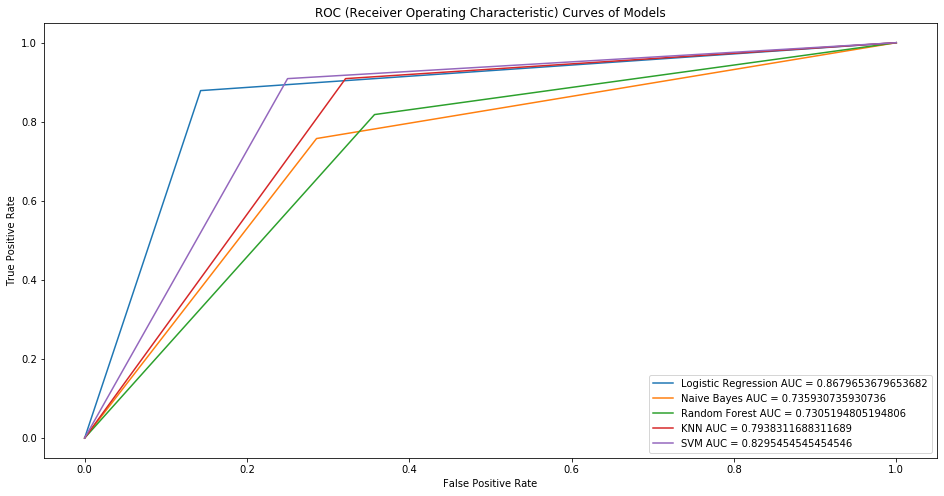

In [37]:
plt.figure()
plt.figure(figsize=(16,8))


fpr_log, tpr_log, thresh_log = metrics.roc_curve(y_test, log_pred_test)
auc_log = metrics.roc_auc_score(y_test, log_pred_test)
plt.plot(fpr_log,tpr_log,label="Logistic Regression AUC = "+str(auc_log))

fpr_nb, tpr_nb, thresh_nb = metrics.roc_curve(y_test, nb_pred_test)
auc_nb = metrics.roc_auc_score(y_test, nb_pred_test)
plt.plot(fpr_nb,tpr_nb,label="Naive Bayes AUC = "+str(auc_nb))

fpr_rf, tpr_rf, thresh_rf = metrics.roc_curve(y_test, rf_pred_test)
auc_rf = metrics.roc_auc_score(y_test, rf_pred_test)
plt.plot(fpr_rf,tpr_rf,label="Random Forest AUC = "+str(auc_rf))

fpr_knn, tpr_knn, thresh_knn = metrics.roc_curve(y_test, knn_pred_test)
auc_knn = metrics.roc_auc_score(y_test, knn_pred_test)
plt.plot(fpr_knn,tpr_knn,label="KNN AUC = "+str(auc_knn))

fpr_svm, tpr_svm, thresh_svm = metrics.roc_curve(y_test, svm_pred_test)
auc_svm = metrics.roc_auc_score(y_test, svm_pred_test)
plt.plot(fpr_svm,tpr_svm,label="SVM AUC = "+str(auc_svm))


plt.legend(loc=0)
plt.title('ROC (Receiver Operating Characteristic) Curves of Models')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')